# Project 3
## Thomas Pinto Franco
## 12/20/19

This project focuses on modeling and plotting the path of an objects orbit around the sun, and affecting said orbit with various pertubation forces. 

Duration of orbit in years:20
R value:0
T value:0
N value:0
Init Pos: [1 0 0]
Init vel: [0.         6.28318531 0.        ]


C:\Users\alien\Anaconda3\lib\site-packages\ipykernel_launcher.py:98: RuntimeWarning: invalid value encountered in double_scalars


-------------Orbital Parameters:-------------
a = [0.         1.         1.         ... 0.99999999 0.99999999 0.99999999]
e = [0.00000000e+00 0.00000000e+00            nan ... 1.05367121e-08
            nan 1.05367121e-08]
i = [0. 0. 0. ... 0. 0. 0.]


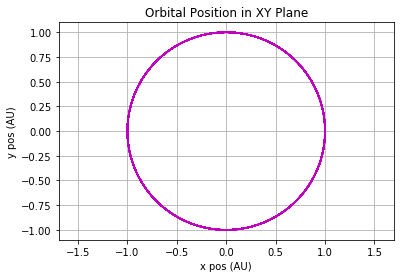

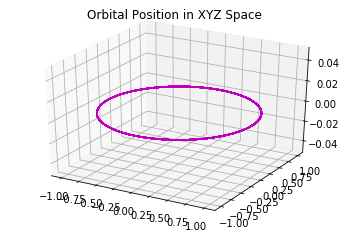

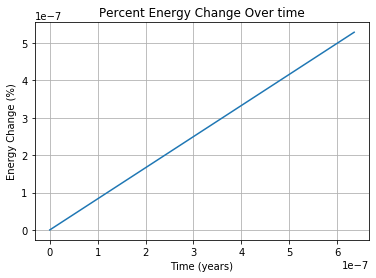

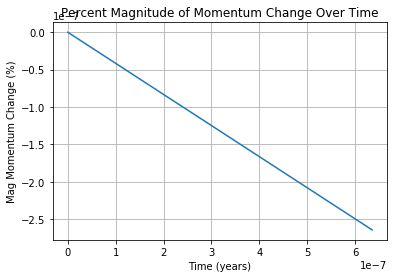

In [139]:
import numpy as np
import math as math
import matplotlib.pyplot as pl
from mpl_toolkits import mplot3d


years = int(input('Duration of orbit in years:'))

AU = 1
GM = 4*np.pi**2 

R = float(input('R value:'))
T = float(input('T value:'))
N = float(input('N value:'))

secYear = 31557600. # amount of seconds in a year



def mainGrav(x,v,m):
    global GM
    
    r = np.linalg.norm(x)
    rHat =  x/r
    nHat = np.cross(x,v)/np.linalg.norm(np.cross(x,v))
    thetaHat = np.cross(nHat,rHat)
    
    F = (GM*m/(r**2))*(-rHat + R*rHat + T*thetaHat + N*nHat) # our beefy force function, involving pertubation forces R, T and N
    
    return F

def rk4(v0, x0, m, dt): # our Runge-Kutta method in order to solve F for position and velocity
    k1 = mainGrav(x0, v0, m)/m    # Estimate 1
    
    x1 = x0 + v0*dt/2
    v1 = v0 + k1*dt/2
    
    k2 = mainGrav(x1, v1, m)/m    # Estimate 2
    
    x2 = x0 + v1*dt/2
    v2 = v0 + k2*dt/2
    
    k3 = mainGrav(x2, v2, m)/m    # Estimate 3
    
    x3 = x0 + v2*dt
    v3 = v0 + k3*dt
    
    k4 = mainGrav(x3, v3, m)/m    # Estimate 4
    
    xn = x0 + (v0 + 2*v1 + 2*v2 + v3)/6*dt
    vn = v0 + (k1 + 2*k2 + 2*k3 + k4)/6*dt
    
    return xn, vn



def ORBIT():
    global GM, AU, secYear
    
    x0 = np.array([AU,0,0])  #setting up initial parameters
    r0 = np.linalg.norm(x0)
    velInit = np.sqrt(GM/r0)
    v0 = np.array([0,velInit,0])
    m = 1
    
    print('Init Pos:',x0) 
    print('Init vel:',v0)
    
    nsteps = 366*years # the amount of days in a year 
    dt = 0.002739726 # the amount of seconds in a day, converted to years
    tyear = np.arange(0.,dt*nsteps,dt)/secYear #An array of time over the course of the input amount of years,
                                                # used to graph change in energy and momentum over time
    
    x = np.zeros((nsteps,3)) # setting up arrays for our main values
    v = np.zeros(((nsteps),3))
    E = np.zeros((nsteps))
    H = np.zeros(((nsteps),3))
    Hmag = np.zeros((nsteps))
    
    x[0,:] = x0  #defining equations and parameters for said values 
    v[0,:] = v0
    E[0] = -GM/np.linalg.norm(x0) + 0.5*np.linalg.norm(v0)**2
    H[0,:] = m*np.cross(x0,v0)
    Hmag[0] = np.linalg.norm(H[0,:])
    
    a = np.zeros((nsteps)) #setting up arrays for our orbital elements
    e = np.zeros((nsteps))
    I = np.zeros((nsteps))
#     omega = np.zeros((nsteps))
    
    for i in range(nsteps-1):      #Looping for 
        x[i+1,:],v[i+1,:] = rk4(v[i,:],x[i,:],m,dt)
        E[i+1] = -GM*m/np.linalg.norm(x[i+1,:]) + 0.5*m*np.linalg.norm(v[i+1,:])**2
        H[i+1,:] = m*np.cross(x[i+1,:],v[i+1,:])
        Hmag[i+1] = np.linalg.norm(H[i+1,:])
        
        a[i+1] = -GM/(2*E[i])
        e[i+1] = ((1 + (2*(Hmag[i]**2)*E[i])/(GM**2)))**(1/2)
        I[i+1] = np.arccos(H[i,2]/Hmag[i])
#         omega[i+1] = np.arctan(-H[i,0]/H[i,1])
    
    
    pl.figure()                                      #All graphs; XY plane, XYZ Space, Energy and momentum change
    pl.title('Orbital Position in XY Plane')
    pl.xlabel('x pos (AU)')
    pl.ylabel('y pos (AU)')
    pl.plot(x[:,0]/AU,x[:,1]/AU,'m')
    pl.axis('equal')
    pl.grid()
    
    pl.figure()
    ax = pl.axes(projection='3d')
    pl.title('Orbital Position in XYZ Space')
    ax.plot3D(x[:,0],x[:,1],x[:,2],'m')
    
    
    pl.figure()
    pl.title('Percent Energy Change Over time')
    pl.xlabel('Time (years)')
    pl.ylabel('Energy Change (%)')
    pl.plot(tyear,(E-E[0])/E[0]*100.)
    pl.grid()
    
    pl.figure()
    pl.title('Percent Magnitude of Momentum Change Over Time')
    pl.xlabel('Time (years)')
    pl.ylabel('Mag Momentum Change (%)')
    pl.plot(tyear,(Hmag-Hmag[0])/Hmag[0]*100.)
    pl.grid()

    
    print('-------------Orbital Parameters:-------------')
    print('a =',a)
    print('e =',e)
    print('i =',I)
#     print('omega =',omega)
#     print('H =',H)
    
    
    
ORBIT()

We can see above that the orbit loops back onto itself after 20 years. Looking at our a, e, and i values, we see that they are equal to (or near) 1, 0, and 0 as expected. As for the energy and angular momentum magnitude percent changes over time, these should be nearly zero; seeing values with magnitudes of 10^-7, this makes sense. 

Now, let's change some initial conditions and start producing orbital parameters, *without* any perturbing forces, to check that our program actually changes depending on starting conditions. Also, let's stuff everything into one big ORBIT function from here on out, just to make future code blocks cleaner.

Duration of orbit in years:50
R value:0
T value:0
N value:0
Init Pos: [1. 0. 1.]
Init vel: [0.       2.641754 2.      ]
-------------Orbital Parameters:-------------
a = [0.         0.88019206 0.88019206 ... 0.87969672 0.87969672 0.87969671]
e = [0.         0.69513298 0.69513298 ... 0.69495591 0.69495591 0.69495591]
i = [0.         0.89771298 0.89771298 ... 0.89771298 0.89771298 0.89771298]
omega = [ 0.       -0.922784 -0.922784 ... -0.922784 -0.922784 -0.922784]


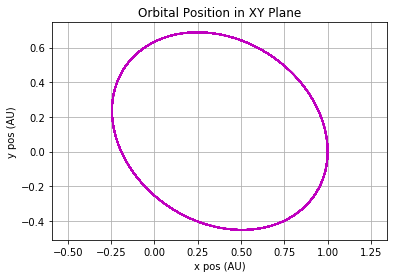

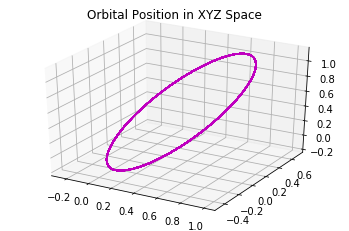

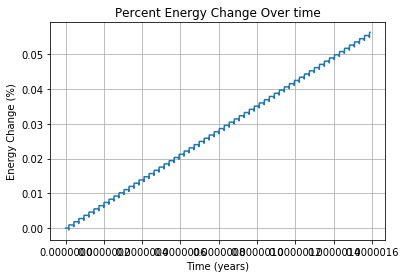

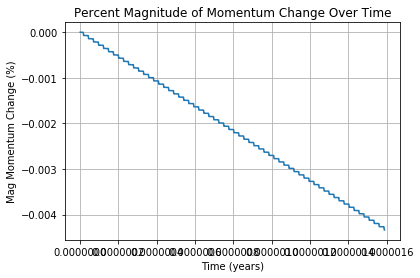

In [135]:

def ORBIT(change1, change2): #adding extra parameters to change initial conditions easily
    global GM, AU, secYear
    
    years = int(input('Duration of orbit in years:'))

    AU = 1. 
    GM = 4*np.pi**2 

    R = float(input('R value:'))
    T = float(input('T value:'))
    N = float(input('N value:'))

    secYear = 31557600.
    
    
    
    def mainGrav(x,v,m):
        global GM
    
        r = np.linalg.norm(x)
        rHat =  x/r
        nHat = np.cross(x,v)/np.linalg.norm(np.cross(x,v))
        thetaHat = np.cross(nHat,rHat)
    
        F = (GM*m/(r**2))*(-rHat + R*rHat + T*thetaHat + N*nHat)
    
        return F

    def rk4(v0, x0, m, dt):
        k1 = mainGrav(x0, v0, m)/m    # Estimate 1
    
        x1 = x0 + v0*dt/2
        v1 = v0 + k1*dt/2
    
        k2 = mainGrav(x1, v1, m)/m    # Estimate 2
    
        x2 = x0 + v1*dt/2
        v2 = v0 + k2*dt/2
    
        k3 = mainGrav(x2, v2, m)/m    # Estimate 3
    
        x3 = x0 + v2*dt
        v3 = v0 + k3*dt
    
        k4 = mainGrav(x3, v3, m)/m    # Estimate 4
    
        xn = x0 + (v0 + 2*v1 + 2*v2 + v3)/6*dt
        vn = v0 + (k1 + 2*k2 + 2*k3 + k4)/6*dt
    
        return xn, vn
    
    
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    
    
    x0 = np.array([AU,0,1]) 
    r0 = np.linalg.norm(x0)
    velInit = np.sqrt(GM/r0)
    v0 = np.array([0,velInit/change1,change2])
    m = 1
    
    print('Init Pos:',x0)
    print('Init vel:',v0)
    
    nsteps = 366*years # the amount of days in a year 
    dt = 0.002739726 # the amount of seconds in a day, converted to years
    tyear = np.arange(0.,dt*nsteps,dt)/secYear
    
    x = np.zeros((nsteps,3))
    v = np.zeros(((nsteps),3))
    E = np.zeros((nsteps))
    H = np.zeros(((nsteps),3))
    Hmag = np.zeros((nsteps))
    
    x[0,:] = x0
    v[0,:] = v0
    E[0] = -GM/np.linalg.norm(x0) + 0.5*np.linalg.norm(v0)**2
    H[0,:] = m*np.cross(x0,v0)
    Hmag[0] = np.linalg.norm(H[0,:])
    
    a = np.zeros((nsteps)) #arrays for oribital parameters
    e = np.zeros((nsteps))
    I = np.zeros((nsteps))
    omega = np.zeros((nsteps))
    
    for i in range(nsteps-1):
        x[i+1,:],v[i+1,:] = rk4(v[i,:],x[i,:],m,dt)
        E[i+1] = -GM*m/np.linalg.norm(x[i+1,:]) + 0.5*m*np.linalg.norm(v[i+1,:])**2
        H[i+1,:] = m*np.cross(x[i+1,:],v[i+1,:])
        Hmag[i+1] = np.linalg.norm(H[i+1,:])
        
        a[i+1] = -GM/(2*E[i])
        e[i+1] = ((1 + (2*(Hmag[i]**2)*E[i])/(GM**2)))**(1/2)
        I[i+1] = np.arccos(H[i,2]/Hmag[i])
        omega[i+1] = np.arctan(-H[i,0]/H[i,1])
        
    
    pl.figure()
    pl.title('Orbital Position in XY Plane')
    pl.xlabel('x pos (AU)')
    pl.ylabel('y pos (AU)')
    pl.plot(x[:,0],x[:,1],'m')
    pl.axis('equal')
    pl.grid()
    
    pl.figure()
    ax = pl.axes(projection='3d')
    pl.title('Orbital Position in XYZ Space')
    ax.plot3D(x[:,0],x[:,1],x[:,2],'m')
    
    
    pl.figure()
    pl.title('Percent Energy Change Over time')
    pl.xlabel('Time (years)')
    pl.ylabel('Energy Change (%)')
    pl.plot(tyear,(E-E[0])/E[0]*100.)
    pl.grid()
    
    pl.figure()
    pl.title('Percent Magnitude of Momentum Change Over Time')
    pl.xlabel('Time (years)')
    pl.ylabel('Mag Momentum Change (%)')
    pl.plot(tyear,(Hmag-Hmag[0])/Hmag[0]*100.)
    pl.grid()

    print('-------------Orbital Parameters:-------------')
    print('a =',a)
    print('e =',e)
    print('i =',I)
    print('omega =',omega)

    
ORBIT(2,2) #divided velInit by 2, and added a little kick in the Z direction.

The most notable aspect here is the push of the starting position up by 1 in the Z direction; looking at the 3D graph, we can see that this is confirmed. We will consider this our initial, nominal case to base all experiments with pertubation forces on.

Let's see the same initial conditions, but with a Radial Peturbing force of 0.1.

Duration of orbit in years:50
R value:0.1
T value:0
N value:0
Init Pos: [1. 0. 1.]
Init vel: [0.       2.641754 2.      ]
-------------Orbital Parameters:-------------
a = [0.         0.88019206 0.88048822 ... 0.88280745 0.88258248 0.88235048]
e = [0.         0.69513298 0.695258   ... 0.69624223 0.6961479  0.69605057]
i = [0.         0.89771298 0.89771298 ... 0.89771298 0.89771298 0.89771298]
omega = [ 0.       -0.922784 -0.922784 ... -0.922784 -0.922784 -0.922784]


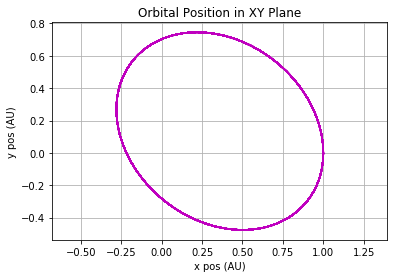

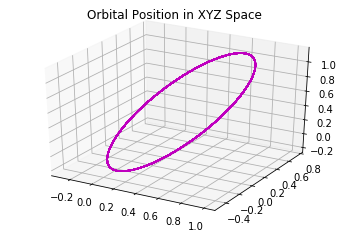

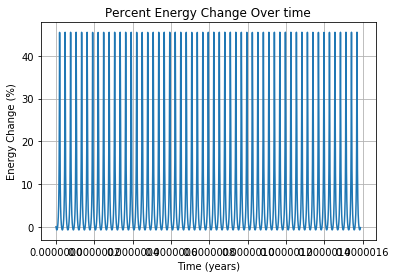

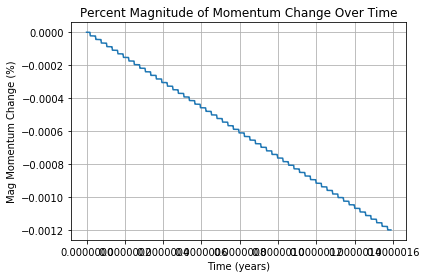

In [119]:
ORBIT(2,2)

Nothing much seems to have changed with our orbit, besides it becoming slightly more oblong (the lefthand side shifts from exactly x = -0.25 to a little past it) and the percent energy change oscillating from 0 to >40% changes, starting and ending at 0. It is clear that our orbital elements are almost exactly the same, save for a and e which only barely differ between this run and the pertubation force free run from before it. This is purely due to their reliance on the orbital energy; this all makes sense, as if a radial perturbing force acts as a sort of radiation pressure, this object will just gain energy which changes direction relative to our axes as the object orbits. This is why we see an oscillating pattern in our percent energy change.

Doing some tests with varying R values, I found that around R = 0.8 is when our object escapes the solar system.

Now for tangential perturbing forces, with T = -0.001.

Duration of orbit in years:50
R value:0
T value:-0.001
N value:0
Init Pos: [1. 0. 1.]
Init vel: [0.       2.641754 2.      ]
-------------Orbital Parameters:-------------
a = [ 0.          0.88019206  0.88018572 ... -0.00627019 -0.00627019
 -0.00627019]
e = [0.         0.69513298 0.69514371 ... 1.54689829 1.54689821 1.54689813]
i = [0.         0.89771298 0.89771298 ... 0.89771298 0.89771298 0.89771298]
omega = [ 0.       -0.922784 -0.922784 ... -0.922784 -0.922784 -0.922784]


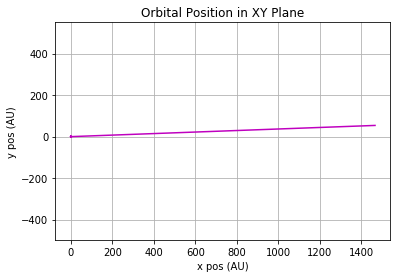

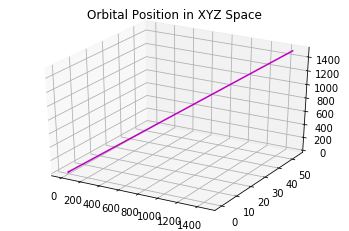

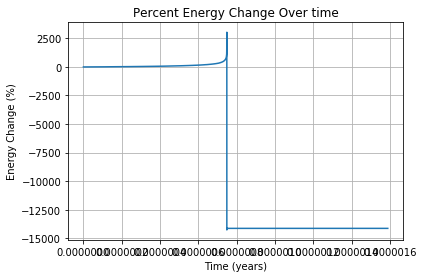

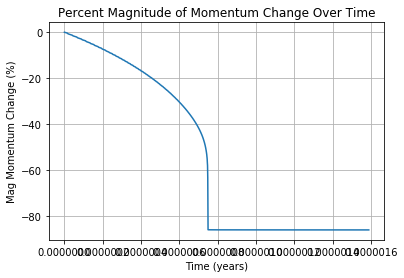

In [128]:
ORBIT(2,2)

Something's up with this. Let's try a smaller amount of time, say 20 years.

Duration of orbit in years:20
R value:0
T value:-0.001
N value:0
Init Pos: [1. 0. 1.]
Init vel: [0.       2.641754 2.      ]
-------------Orbital Parameters:-------------
a = [0.         0.88019206 0.88018572 ... 0.29936256 0.29934903 0.29933523]
e = [0.         0.69513298 0.69514371 ... 0.57622077 0.57629009 0.57635952]
i = [0.         0.89771298 0.89771298 ... 0.89771298 0.89771298 0.89771298]
omega = [ 0.       -0.922784 -0.922784 ... -0.922784 -0.922784 -0.922784]


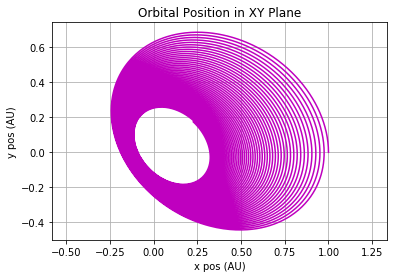

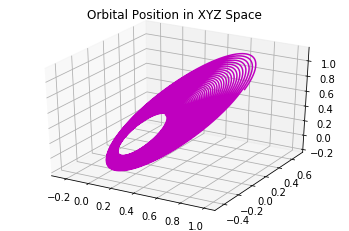

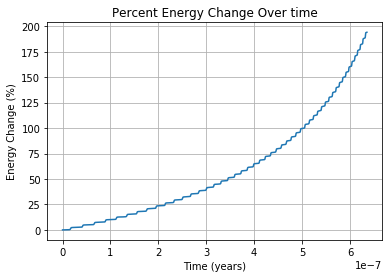

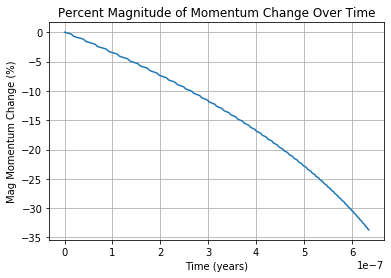

In [123]:
ORBIT(2,2)

We can see that our object on the XY plane starts at (1,0) as instructed, and then begins to spiral inwards. Looking back at our first graphs (with the long line), if you look closely you can see a dot on the lefthand end of the graph. Performing further inspections (a.k.a. steadily increasing the amount of years to see how the orbit path changes over time), it's clear that our object, due to this pertubation force combined with it's initial conditions, spirals inwards and gains a large amount of kinetic energy in a very small amount of time, causing it to shoot off and out of the solar system!

Looking back at the 50 year graph, the orbital element values all begin the same as the nominal within their arrays, but the end terms differ greatly. This makes sense when looking at our "younger" graph of 20 years, whose path clearly started with the same conditions as that of the nominal graph, but started to spiral inwards due to the off-radial directional impact of the sun's photons as the object moves. Thus, as the object gets closer to the sun, this effect becomes greater and greater, until it finally shoots out of the solar system.

Attempting smaller values of T (-0.00001) demonstrates that the rate of change of a and e is indeed proportional to T, as at lower values of T over the same course of time, the path barely deviates from the nominal. Going up to T = -0.0001, we see greater devation, but still not as notable compared to the given value of T.

We can conclude then, that the ultimate fate of dust particles in our solar system is to eventually be ejected!

Finally, let's try a normal perturbing force N = 0.01.

Duration of orbit in years:50
R value:0
T value:0
N value:0.01
Init Pos: [1. 0. 1.]
Init vel: [0.       2.641754 2.      ]
-------------Orbital Parameters:-------------
a = [0.         0.88019206 0.88019206 ... 0.8796967  0.8796967  0.8796967 ]
e = [0.         0.69513298 0.69513298 ... 0.6949559  0.6949559  0.6949559 ]
i = [0.         0.89771298 0.89778945 ... 2.05634489 2.05671878 2.05708435]
omega = [ 0.         -0.922784   -0.92257527 ...  1.01467586  1.0146731
  1.01468048]


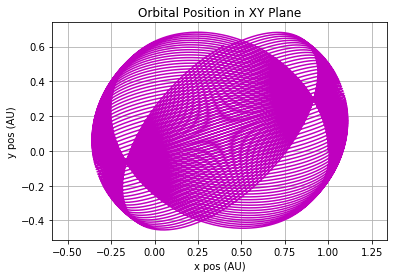

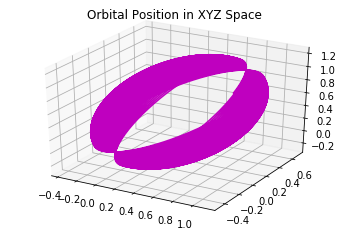

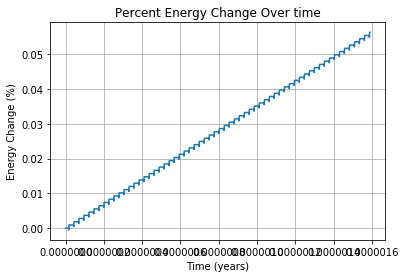

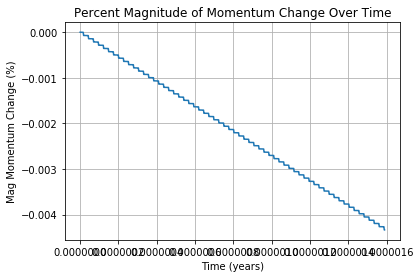

In [131]:
ORBIT(2,2)

Oh dear. Let's lower the amount of years like last time, and see if that helps us understand what's going on here.

Duration of orbit in years:5
R value:0
T value:0
N value:0.01
Init Pos: [1. 0. 1.]
Init vel: [0.       2.641754 2.      ]
-------------Orbital Parameters:-------------
a = [0.         0.88019206 0.88019206 ... 0.8801433  0.8801433  0.8801433 ]
e = [0.         0.69513298 0.69513298 ... 0.69511556 0.69511556 0.69511556]
i = [0.         0.89771298 0.89778945 ... 0.96168903 0.96177136 0.96185277]
omega = [ 0.         -0.922784   -0.92257527 ... -0.66609189 -0.66590521
 -0.66571827]


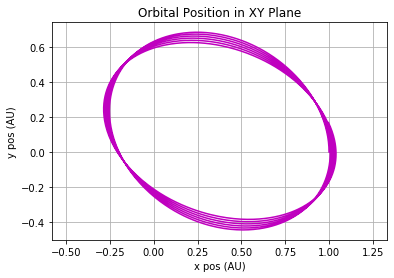

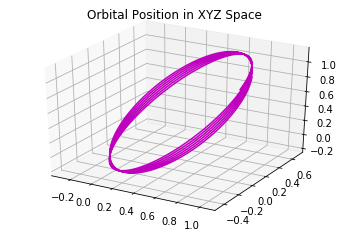

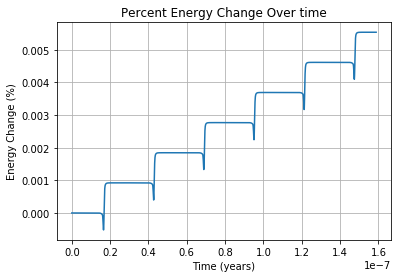

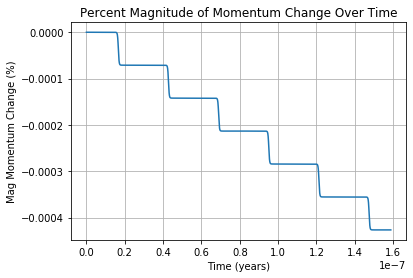

In [125]:
ORBIT(2,2)

After messing with this for a bit, we can see that this object's orbit seems to almost oscillate, continuously increasing the height of one side of the orbit and decreasing the other. This clearly goes to an insane level when we reach the point of 50 years, creating what appears to be a bean-esque ellipsoid.

Many of our orbital element values here are similar compared to the base run, most notably our i value at the end of the array, jumping from ~0.89 to ~2.05! This indicates that over time, our angular momentum changes notably. Because the N perturbing force is normal to the XY orbit plane, this will induce an angular momentum change in the Z directions, which causes our orbit plane to wobble. This also explains why the other orbital parameters look roughly the same, as other related values aren't being affected. 